<h1>SPACE RACE</H1>

<h5>Data Exploration & Visualization of the global space race from 1957 using space mission data</h5>
<h5>Looking over Kaggle, I found a dataset that shows the space missions from 1957 to 2020.</h5>

[Kaggle Data](https://www.kaggle.com/datasets/sefercanapaydn/mission-launches/data)

<p>Comments and Markdowns added for readability.</p>

In [1]:
#Importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns
from iso3166 import countries

In [2]:
#Read the csv data into a pandas dataframe
missions_df = pd.read_csv('mission_launches.csv')

In [3]:
#For a holistic view of the data 
missions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [4]:
missions_df.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


<h4>Data Cleaning</h4>


In [5]:
#Identifying missing values and duplicates
print(f'Are there Nan Values?:{missions_df.isna().values.any()} ')
print(f'Are there Duplicates Values?:{missions_df.duplicated().values.any()} ')

Are there Nan Values?:True 
Are there Duplicates Values?:False 


In [6]:
missions_df.isna().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

In [7]:
#Eliminating Nan and coverting data type of the price
missions_df['Price'] = pd.to_numeric(missions_df.Price, errors="coerce").fillna(0)
missions_df['Price'] = missions_df.Price.replace(",", "", regex=True)
missions_df['Price'] = missions_df.Price.astype(float)


In [8]:
missions_df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)

<h4>Date Formatting</h4>

In [9]:
missions_df['Date'] = pd.to_datetime(missions_df.Date, utc=True, errors="coerce")

In [10]:
missions_df['Year'] = missions_df.Date.dt.year
missions_df['Year'] = missions_df.Year.fillna(0).astype(int)
missions_df = missions_df[missions_df.Year != 0]

In [11]:
print(f'Most Recent year in the dataset: {missions_df['Year'].max()}')
print(f'Oldest year in the dataset: {missions_df['Year'].min()}')

Most Recent year in the dataset: 2020
Oldest year in the dataset: 1957


<h2>Data Exploration</h2>

<h4>Location Mapping</h4>

In [12]:
missions_df['Country'] = missions_df.Location.str.split(",").str[-1]

In [13]:
#Updating Country Names and Mapping Location
missions_df['Country'] = missions_df.Country.str.strip()

missions_df['Country'] = missions_df.Country.replace({
    'Shahrud Missile Test Site': 'Iran, Islamic Republic of',
    'New Mexico': 'United States of America',
    'Yellow Sea': 'China',
    'Pacific Missile Range Facility': 'United States of America',
    'Pacific Ocean': 'United States of America',
    'Barents Sea': 'Russian Federation',
    'Gran Canaria': 'Spain',
    'North Korea': 'Korea, Democratic People\'s Republic of',
    'South Korea': 'Korea, Republic of',
    'Russia': 'Russian Federation',
    'Iran': 'Iran, Islamic Republic of',
    'USA': 'United States of America'
})

In [14]:
#Extracting country codes from location data
missions_df['Country_Code'] = missions_df.Country.apply(lambda x: (countries.get(x).alpha3))

In [15]:
print(f'There are {missions_df['Country'].nunique()} countries with {missions_df['Country_Code'].nunique()} unique country codes')

There are 16 countries with 16 unique country codes


<h4>Agency Classification</h4>

In [16]:
#Location mapping above was done procedurally. Assigning agency status would be done by a function
def agency_status(org):
    private_orgs = {
        'lockheed', 'land launch', 'northrop', 'arianespace', 'i-space',
        'boeing', 'martin marietta', 'expace', 'exos', 'virgin orbit',
        'spacex', 'general dynamics','douglas', 'rocket lab', 'ils',
        'blue origin', 'sea launch', 'onespace', 'landspace', 'eurockot'
    }

    government_orgs = {
        'casic', 'asi', 'src', 'casc', 'yuzhmash', 'cecles', 'kosmotras',
        'mhi', 'us navy', 'kari', 'okb-586', 'us air force', 'khrunichev',
        'ut', 'jaxa', 'isa', 'irgc', 'roscosmos', 'esa', 'rvsn ussr', 'vks rf',
        'nasa', 'eer', 'rae', 'cnes', 'ula', 'sandia', 'iai', 'starsem',
        'mitt', 'aeb', 'isro', 'amba', "arm??e de l'air", 'isas', 'kcst'
    }

    if org.lower() in private_orgs:
        return 'Private'
    elif org.lower() in government_orgs:
        return 'Government'
    else:
        return 'Unknown'

In [17]:
#Using the function to derive a column for the organisational status
missions_df['Agency_Type'] = missions_df.Organisation.apply(agency_status)

In [18]:
print(missions_df['Agency_Type'].value_counts())

Agency_Type
Government    3027
Private       1171
Name: count, dtype: int64


<h4>Annual Launches</h4>

In [19]:
#Number of missions done per year
missions_per_year = missions_df.groupby('Year').size().reset_index(name='Mission_Count')

In [20]:
#Number of missions done by each Country per year
annual_country = missions_df.groupby(['Year', 'Country']).size().reset_index(name='Missions')

In [21]:
#Creating a separate index for the df
#Prior to this, animated bar chart below only included countries that had launched as at 1957.
all_years = range(annual_country.Year.min(), annual_country.Year.max() + 1)
all_countries = annual_country.Country.unique()

complete_index = pd.MultiIndex.from_product([all_years, all_countries], names=['Year', 'Country'])

annual_country = annual_country.set_index(['Year', 'Country']).reindex(complete_index, fill_value=0).reset_index()

In [22]:
#Creating a column to sum number of missions in current year with number of past launches
annual_country['Cumulative_Missions'] = (
    annual_country.groupby('Country').Missions.cumsum()
)

<h4>Success Rates</h4>

In [23]:
#Creating a dataframe of countries and their mission status to chart successes
success_by_country = pd.crosstab(missions_df.Country_Code, missions_df.Mission_Status)
success_by_country['Total_Missions'] = success_by_country.sum(axis=1)

In [24]:
annual_status = missions_df.groupby(['Year', 'Mission_Status']).size().unstack(fill_value=0)

In [25]:
#To determine Success rates
missions_df['Success_Binary'] = missions_df.Mission_Status.apply(lambda x: 1 if x == 'Success' else 0)

<h4>Expenditure Estimation</h4>

In [26]:
expenditure_by_type = missions_df.groupby('Agency_Type').Price.sum()

In [27]:
#To account for absent price data
#Using the median as mean makes the data susceptible to deviations from outliers
missions_df['Price_Filled'] = missions_df.Price
missions_df.loc[missions_df['Price_Filled'] == 0, 'Price_Filled'] = np.nan

missions_df['Price_Filled'] = missions_df.groupby('Agency_Type').Price_Filled.transform(
    lambda x: x.fillna(x.median())
)

<h2>Data Visualization</h2>

<p>To better understand of the data extracted in the exploration above, we can proceed to visualize some of it in charts and maps to make some sense of the information and dissect for underlying trends</p>


<h4>Number of Missions Over Time</h4>

In [28]:
fig = px.line(missions_per_year, x='Year', y='Mission_Count',
              title='Interactive View: Number of Space Missions Over Time')

fig.update_layout(
    xaxis=dict(rangeslider=dict(visible=True), title='Year'),
    yaxis_title='Mission Count'
)

fig.show()

<p>In 1957 the USSR (now the Russian Federation) launched Sputnik, officially beginning the space race. This can be found in the datset.

In 1962, the world came close to a nuclear war heightening rocket development. Peace treaties were signed in 1963, leading to a sharp decline. The cold war ushered in the  development of military defence systems, surveillance, information systems and communication satellites.

However, how many of these missions were actually <b>successful?</b></p>

<h4>Annual Success Rates</h4>

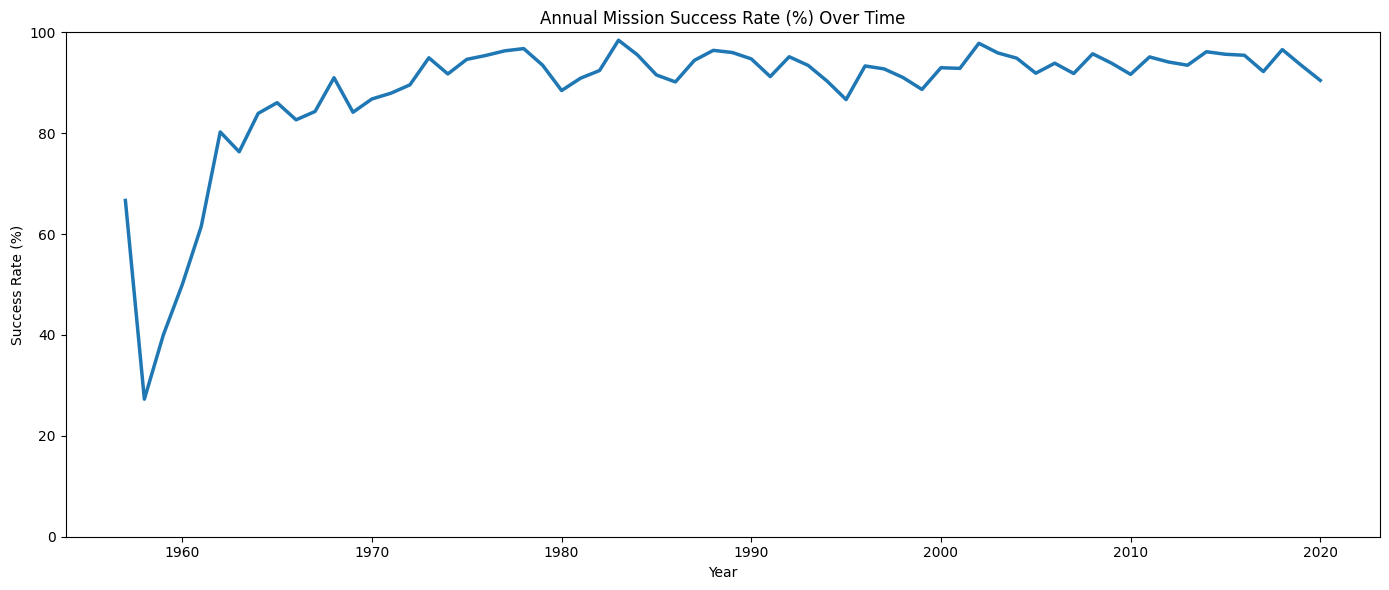

In [29]:
success_rate = missions_df.groupby('Year').Success_Binary.mean().reset_index()
success_rate['Success_Percent'] = success_rate.Success_Binary * 100

plt.figure(figsize=(14, 6))
sns.lineplot(data=success_rate, x='Year', y='Success_Percent', linewidth=2.5)
plt.title('Annual Mission Success Rate (%) Over Time')
plt.ylabel('Success Rate (%)')
plt.xlabel('Year')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

<p>Shows a declining success rate till around the start of the 60's. But it does not quite make sense of the complete picture.</p>

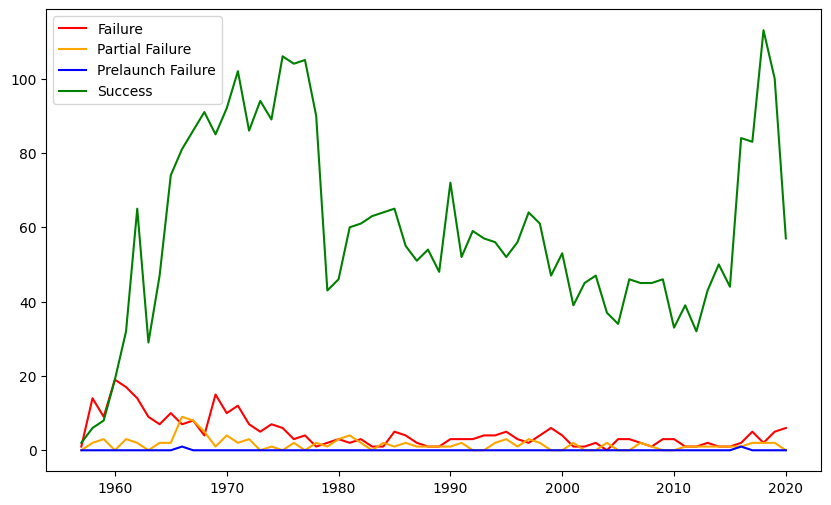

In [30]:
status_counts = missions_df.groupby(['Year', 'Mission_Status']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 6))

plt.plot(status_counts.index, status_counts['Failure'], label='Failure', color='red')
plt.plot(status_counts.index, status_counts['Partial Failure'], label='Partial Failure', color='orange')
plt.plot(status_counts.index, status_counts['Prelaunch Failure'], label='Prelaunch Failure', color='blue')
plt.plot(status_counts.index, status_counts['Success'], label='Success', color='green')
plt.legend()
plt.show()

<p>There were more failures than successful attemtst up until 1960 when the number of succesful missions superceded the number of space missions that failed.</p>

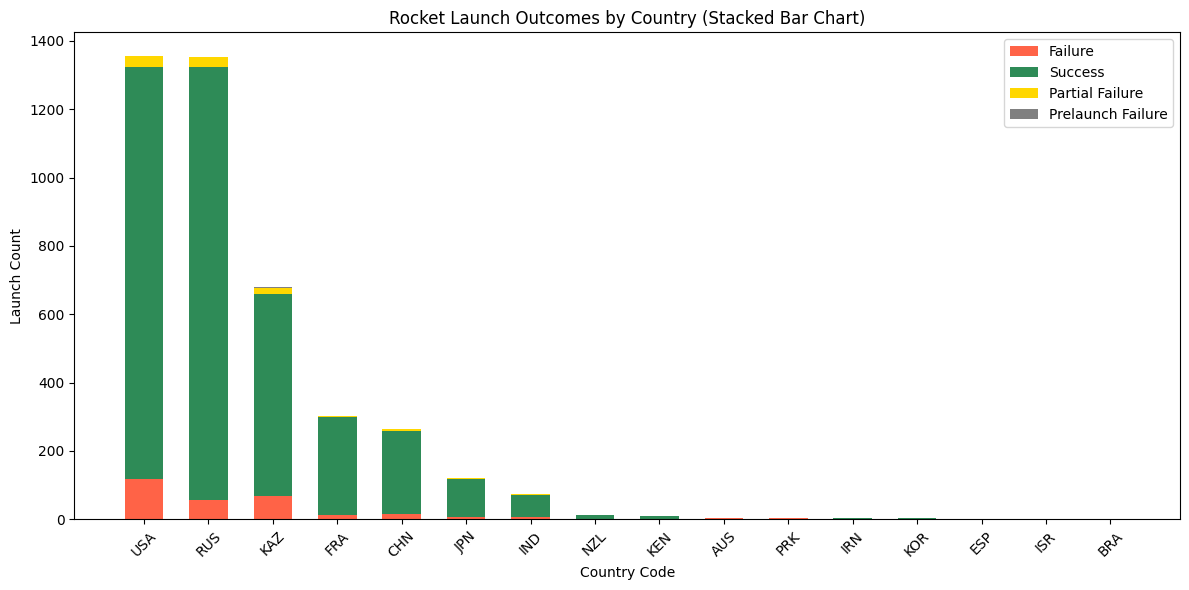

In [31]:
success_by_country.sort_values('Total_Missions', ascending=False, inplace=True)
success_by_country.reset_index(inplace=True)

x = np.arange(len(success_by_country))
bar_width = 0.6

failure = success_by_country['Failure']
success = success_by_country['Success']
partial_failure = success_by_country['Partial Failure']
prelaunch_failure = success_by_country['Prelaunch Failure']

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(x, failure, bar_width, label='Failure', color='tomato')
ax.bar(x, success, bar_width, bottom=failure, label='Success', color='seagreen')
ax.bar(x, partial_failure, bar_width, bottom=failure + success, label='Partial Failure', color='gold')
ax.bar(x, prelaunch_failure, bar_width, bottom=failure + success + partial_failure, label='Prelaunch Failure', color='gray')

ax.set_xticks(x)
ax.set_xticklabels(success_by_country['Country_Code'], rotation=45)
ax.set_xlabel('Country Code')
ax.set_ylabel('Launch Count')
ax.set_title('Rocket Launch Outcomes by Country (Stacked Bar Chart)')
ax.legend()

plt.tight_layout()
plt.show()

<p>The bar chart shows the full barchart of the missions launched per country from 1957. Each bar subdivided into its mission status showing what fraction of the missions were successful.
Although America has a higher launch count than Russia, the Russian Federation seems to have launched more successful missions as at 2020. This chart however fails to capture the progress over time</p>

In [32]:
fig = px.bar(
    annual_country,
    x="Cumulative_Missions",
    y="Country",
    color="Country",
    animation_frame="Year",
    title="Space Race Over Time (Animated) - All Countries",
    range_x=[0, annual_country.Cumulative_Missions.max() + 100],
    height=700
)
fig.update_layout(yaxis={'categoryorder': 'total ascending'})
fig.show()

<p>America had a global dominance in number of explorations launched until 1973. Russia and Kazakhstan(then the USSR) swiftly took the lead well into the 21st century where America caught up. This may be due to the emergence of private companies engaging in space exploration. This could also explain the late growth in French launches.</p>
<p>To visualise geographical distribution of space contributions we can make use of a Plotly Chloroploth Map</p>

In [33]:
country_counts = missions_df.Country.value_counts().reset_index()
country_counts.columns = ['Country', 'Mission_Count']

fig = px.choropleth(
    country_counts,
    locations='Country',
    locationmode='country names',
    color='Mission_Count',
    color_continuous_scale='Viridis',
    title='Global Distribution of Space Missions by Country'
)
fig.update_layout(geo=dict(showframe=False, projection_type='natural earth'))
fig.show()

<p>Clearly shows the geographical distribution of the launches but is limited to a country scale.
Now to examine if any particular launch sites were favoured.</p>

<h4>Launch Site Popularity</h4>

<Figure size 1200x600 with 0 Axes>

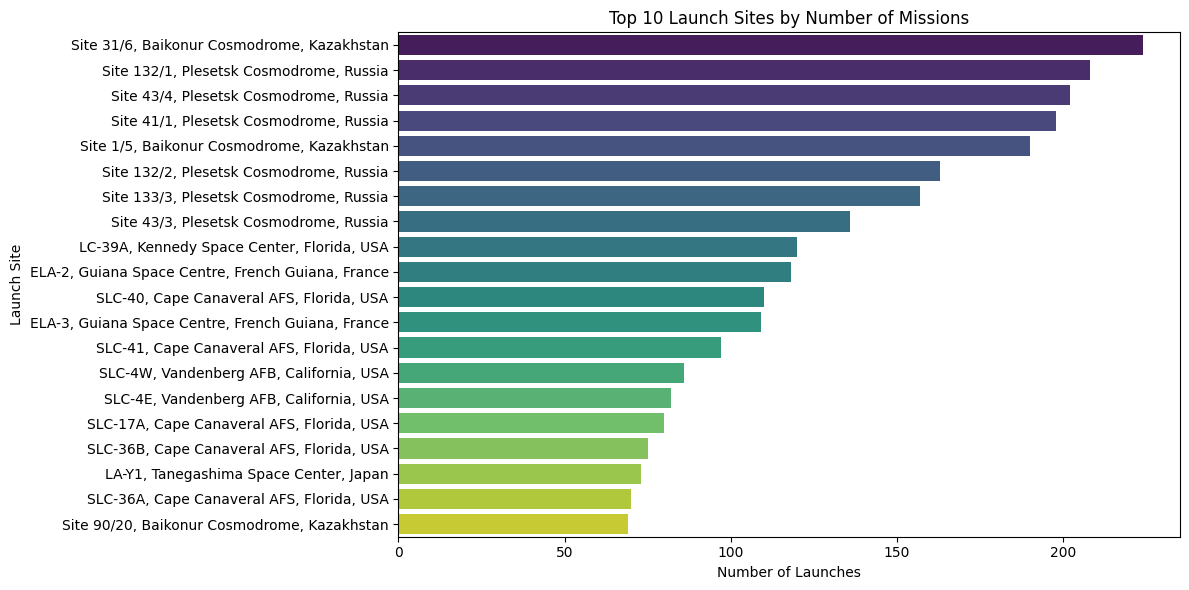

In [34]:
missions_df['Location'] = missions_df.Location.str.strip()


top_sites = missions_df.Location.value_counts().head(20).reset_index()
top_sites.columns = ['Launch_Site', 'Launch_Count']

# Plot
plt.figure(figsize=(12, 6))
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_sites,
    x='Launch_Count',
    y='Launch_Site',
    hue='Launch_Site',
    palette='viridis',
    dodge=False,
    legend=False        
)
plt.title('Top 10 Launch Sites by Number of Missions')
plt.xlabel('Number of Launches')
plt.ylabel('Launch Site')
plt.tight_layout()
plt.show()

<p>The bar chart animated over time showed an American dominance in space launches when cummulated, yet this chart seems to show a Kazakhstani and Russian lead. Perhaps this is due to a spike during a certain time period. Analysing through a heatmap may provide clarity</p>

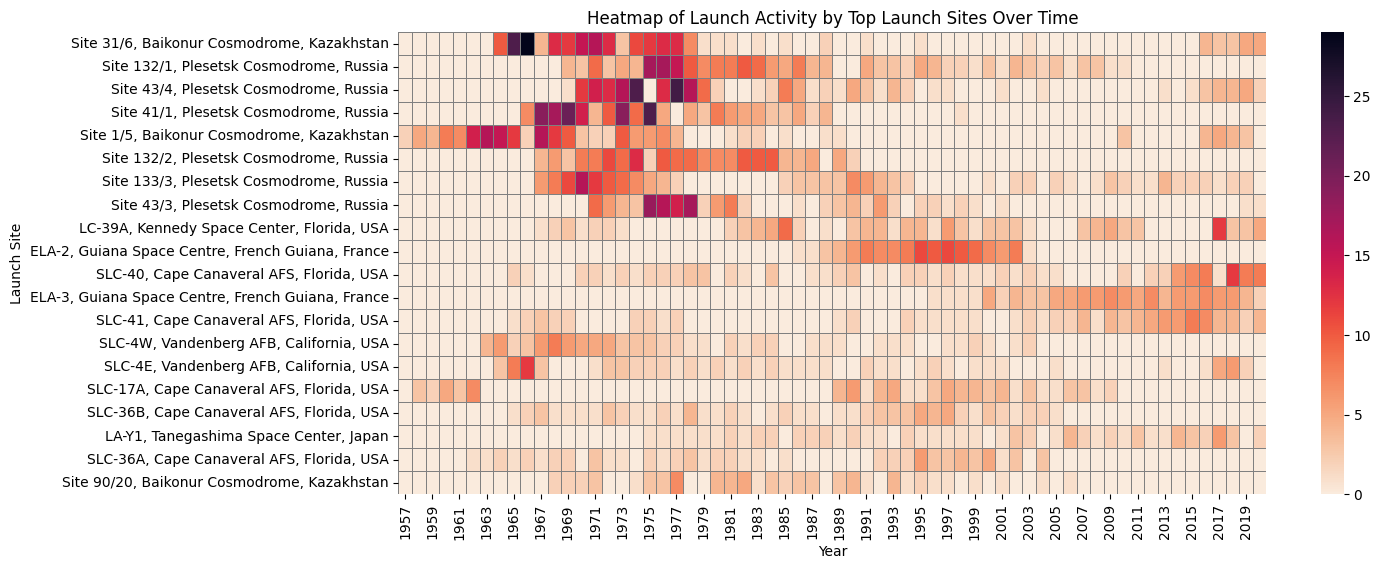

In [35]:
site_year = missions_df.groupby(['Location', 'Year']).size().unstack(fill_value=0)

top_launch_sites = missions_df['Location'].value_counts().head(20).index
site_year_top = site_year.loc[top_launch_sites]

plt.figure(figsize=(14, 6))
sns.heatmap(site_year_top, cmap='rocket_r', linewidths=0.5, linecolor='gray')
plt.title('Heatmap of Launch Activity by Top Launch Sites Over Time')
plt.xlabel('Year')
plt.ylabel('Launch Site')
plt.show()


<p>The sites in Russia and Kazakhstan(then part of the USSR) although heavily active in the 60's and 70's, saw a decline in launches at the end of the 1970s.</p>
<p>Perhaps specific agencies had part to play in this decline.</p>

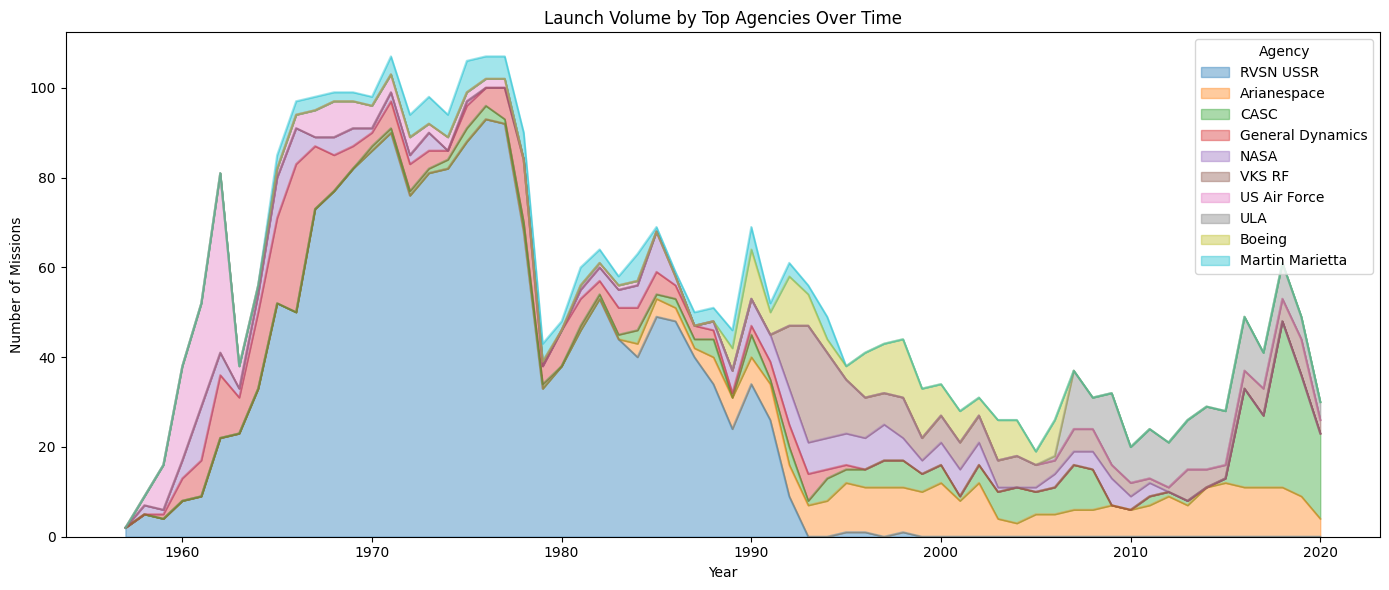

In [36]:
agency_yearly = missions_df.groupby(['Year', 'Organisation']).size().unstack(fill_value=0)

top_agencies = missions_df.Organisation.value_counts().head(10).index
agency_yearly_top = agency_yearly[top_agencies]


agency_yearly_top.plot.area(figsize=(14, 6), alpha=0.4)
plt.title('Launch Volume by Top Agencies Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Missions')
plt.legend(title='Agency')
plt.tight_layout()
plt.show()

After a rapid global decline in the number of launched missions, operations of the RVSN USSR are seen to have died down in the 1990's. This was swiftly followed by a dominance of private agencies like Boeing and Martin Marietta. 
Let's probe into the expenditure requirement of these agencies

In [37]:
agg = missions_df.groupby(['Agency_Type', 'Country_Code', 'Organisation']).Price.sum().reset_index()

fig = px.sunburst(
    agg,
    path=['Agency_Type', 'Country_Code', 'Organisation'],
    values='Price',
    color='Agency_Type',
    color_discrete_map={'Private': '#0046FF', 'Government': '#EF553B'},
    title='Expenditure by Agency Type and Organisation'
)

fig.update_layout(margin=dict(t=50, l=0, r=0, b=0))
fig.show()


This shows about a quarter of the Space Mission expenditure is utilised by private organisations. This data does not seem to accurately depict Russian dominance along side America, perhaps due to lack of public disclosure for their defence spendings.

In [38]:
agg = missions_df.groupby(['Agency_Type', 'Country_Code', 'Organisation']).Price_Filled.sum().reset_index()

fig = px.sunburst(
    agg,
    path=['Agency_Type', 'Country_Code', 'Organisation'],
    values='Price_Filled',
    color='Agency_Type',
    color_discrete_map={'Private': '#636EFA', 'Government': '#FFA673'},
    title='Expenditure by Agency Type and Organisation'
)

fig.update_layout(margin=dict(t=50, l=0, r=0, b=0))
fig.show()
